In [1]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from sklearn_evaluation import plot
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open('./result/test/model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights('./result/test/weights-42-0.90.hdf5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 96, 96)        1600      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 48, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 48, 96)       102400    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 24, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 24, 96)       409600    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 21, 2, 96)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4032)              0         
__________

In [4]:
def make_cv_folds(X, y, folds, fold_num):
    X_train = []
    y_train = []
    X_valid = []
    y_valid = []

    for index, fold in enumerate(folds):
        if fold == fold_num:
            X_valid.append(X[index])
            y_valid.append(y[index])
        else:
            X_train.append(X[index])
            y_train.append(y[index])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_valid = np.array(X_valid)
    y_valid = np.array(y_valid)


    return X_train, y_train, X_valid, y_valid

In [15]:
# Data loading
dataset_path = 'save_data/npy_files'
result_path = 'result/'
X = np.load(os.path.join(dataset_path,'X.npy'))
y = np.load(os.path.join(dataset_path,'y.npy'))
folds = np.load(os.path.join(dataset_path,'folds.npy'))

# rescale [0,255] -> [0,2]    
#X = X.astype('float32')/255*2


val_fold = 0
X_train, y_train, X_valid, y_valid = make_cv_folds(X, y, folds, val_fold)

In [6]:
y_prob = model.predict(X_valid)
y_classes = y_prob.argmax(axis=-1)

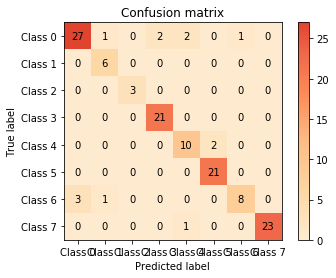

In [7]:
plot.confusion_matrix(y_valid, y_classes)

In [8]:
from sklearn.metrics import classification_report

In [9]:
print(classification_report(y_valid, y_classes))

             precision    recall  f1-score   support

          0       0.90      0.82      0.86        33
          1       0.75      1.00      0.86         6
          2       1.00      1.00      1.00         3
          3       0.91      1.00      0.95        21
          4       0.77      0.83      0.80        12
          5       0.91      1.00      0.95        21
          6       0.89      0.67      0.76        12
          7       1.00      0.96      0.98        24

avg / total       0.90      0.90      0.90       132



In [11]:
from PIL import Image

In [19]:
X_img = []
for img in X_valid:
    img = img.reshape(96,96)
    img = Image.fromarray(img, 'L')
    X_img.append(img)

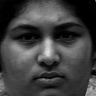

In [21]:
X_img[0]

In [25]:
model.predict(X_valid)

array([[0.00e+00, 8.61e-07, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 2.95e-17, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 4.03e-33, 0.00e+00]],
      dtype=float32)

In [26]:
%matplotlib inline

In [53]:
def make_text(data_num):
    emotion_label = ['Neutral', 'Angry', 'Contempt', 'Disgust', 
                     'Fear', 'Happy', 'Sadness', 'Surprise']
    y_valid_text = emotion_label[y_valid[data_num]]
    y_predict_text = emotion_label[y_classes[data_num]]
    return 'True class : ' + y_valid_text + '\nPredicted : ' + y_predict_text

In [54]:
def plotting(data_num):
    fig = plt.figure(figsize=(20,5))

    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 30,
            }
    ax = fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
    ax.imshow(X_img[data_num])
    text = make_text(data_num)
    ax = fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
    plt.text(0.5, 0.5, text, fontdict=font, ha='center', va='center', transform=ax.transAxes)

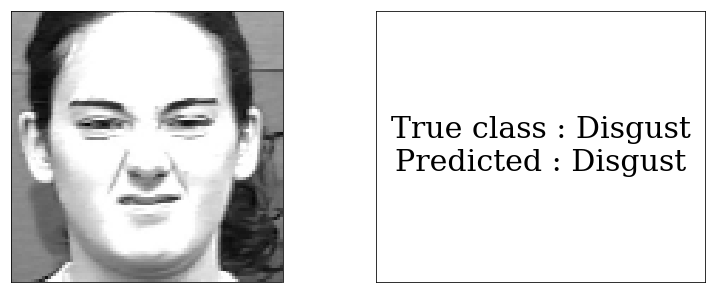

In [55]:
plotting(10)